# Effect of Number of Children and Gender on Adult Student's Academic Interests and Performance

## 1. Project Description
<br>The project uses survey data on adult students at Robert Kennedy College (Switzerland) to test
<br>whether the number of children and students' gender affect their academic perfomance.
<br>It also tests gender based hypotheses about students' interest on data-related fields.
<br>
<br>**Techniques used:**
<br>Data Cleaning, Descriptive Statistics, Randomization Tests
<br>T-Tests, Comparison of Frequency Distributions, Data Visualization

## 2. Environment Setup

In [1]:
pip install nb_black

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
!python3 -m pip install plotly

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


<IPython.core.display.Javascript object>

In [4]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
from plotly import graph_objs as go

init_notebook_mode(connected=True)
%matplotlib inline

<IPython.core.display.Javascript object>

## 3. Data Profiling

#### Open and View the File

In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
file = pd.read_csv(r"data/dataanalytics-class-data.csv")
file.head()

,ID,Start time,Completion time,Email,Gender,Age,Closest biggest city near you,Number of kids (<18y) living with you,Birth Year,Number of modules completed so far,Average mark so far,Prediction for this module's mark,I enjoy working with data,I am excited about working with data,I am afraid of working with data,I am interested in understanding Data Analytics,I plan to work hard in this module,"Height (absolute value, in centimeters (cm) - sorry imperial system users!)",Height (relative)
0,2,12/17/20 9:09:33,12/17/20 9:10:55,anonymous,Woman,40-49,Lagos,0,1975,5,62.0,62,Agree,Agree,Completely Disagree,Agree,Agree,175.0,very tall
1,3,12/17/20 9:09:27,12/17/20 9:11:01,anonymous,Man,30-39,Dhaka,0,1011986,5,57.0,65,Agree,Agree,Completely Disagree,Agree,Agree,172.0,average
2,4,12/17/20 9:09:34,12/17/20 9:14:39,anonymous,Man,30-39,Hanoi,0,1989,5,61.0,64,Agree,Meh,Disagree,Meh,Meh,178.0,average
3,5,12/17/20 9:19:54,12/17/20 9:27:03,anonymous,Woman,50-59,Stockholm,0,1970,5,60.0,100,Agree,Agree,Completely Disagree,Agree,Completely Agree,164.0,average
4,6,12/17/20 9:28:13,12/17/20 9:35:44,anonymous,Man,40-49,Accra,3,1979,5,60.0,70,Completely Agree,Agree,Completely Disagree,Completely Agree,Meh,170.0,average


<IPython.core.display.Javascript object>

In [ ]:
file.tail()

In [ ]:
file.columns

#### Dropping columns with data that is not useful to the analysis

In [6]:
unrelated_columns = ["ID", "Email"]
file = file.drop(columns=unrelated_columns)

<IPython.core.display.Javascript object>

#### Renaming all columns to snake case and shorter names 

In [7]:
file = file.rename(
    columns={
        "Start time": "Start_time",
        "Completion time": "End_time",
        "Closest biggest city near you": "City",
        "Number of kids (<18y) living with you": "Kids",
        "Birth Year": "Birth_year",
        "Number of modules completed so far": "Modules_num",
        "Average mark so far": "Average_grade",
        "Prediction for this module's mark": "Prediction_grade",
        "Height (absolute value, in centimeters (cm) - sorry imperial system users!)": "Height_cm",
        "Height (relative)": "Height_relative",
        "I enjoy working with data": "Enjoy_data",
        "I am excited about working with data": "Excited_data",
        "I am afraid of working with data": "Afraid_data",
        "I am interested in understanding Data Analytics": "Interested_DA",
        "I plan to work hard in this module": "Work_hard",
    }
)

<IPython.core.display.Javascript object>

In [ ]:
file_info = file.info()

In [8]:
file["Modules_num"] = file["Modules_num"].str.replace("none", "0")

<IPython.core.display.Javascript object>

In [9]:
file["Modules_num"] = file["Modules_num"].astype("int32")

<IPython.core.display.Javascript object>

In [10]:
file.isnull().sum()

Start_time          0
End_time            0
Gender              0
Age                 0
City                0
Kids                0
Birth_year          0
Modules_num         0
Average_grade       3
Prediction_grade    0
Enjoy_data          0
Excited_data        0
Afraid_data         0
Interested_DA       0
Work_hard           0
Height_cm           0
Height_relative     0
dtype: int64

<IPython.core.display.Javascript object>

## 3. Data Cleansing

### Helper Methods

In [11]:
def clean_birth_year(year_value):
    now = datetime.datetime.now()
    current_year = now.year
    digits_num = int(math.log10(year_value)) + 1
    year_value = str(year_value)
    if digits_num > 4:
        year_value = year_value[-4:]
    elif digits_num < 4:
        year_value = current_year - int(year_value)
    return int(year_value)


def convert_age_to_list_range(age_item):
    if "-" in age_item:
        age_item = age_item.split("-")
        first_num = int(age_item[0])
        second_num = int(age_item[1])
        age_item = [first_num, second_num]
    else:
        age_item = age_item.split("+")
        first_num = int(age_item[0])
        second_num = 100
        age_item = [first_num, second_num]
    return age_item


<IPython.core.display.Javascript object>

### Missing Values

#### Dropping all the rows with null values

In [ ]:
file = file.dropna()
file = file.reset_index(drop=True)
file.info()

#### Exploring the Birth Year and Age

In [ ]:
file[['Birth_year', 'Age']]

Using a helper method clean_birth_year() to clean the years: from a more than 4-digit number takes only last 4 digits, for each 2 digit number subtracts the number from the current year to find the birth year 

In [12]:
file["Birth_year"] = file["Birth_year"].apply(clean_birth_year)

<IPython.core.display.Javascript object>

Subtracting from the current year the birth year (to explore if it is in the age range)

In [13]:
ages_calculated_by_birth_year = []
now = datetime.datetime.now()
current_year = now.year
for i in file["Birth_year"]:
    age = current_year - i
    ages_calculated_by_birth_year.append(age)

file["Age_by_birth_year"] = ages_calculated_by_birth_year

<IPython.core.display.Javascript object>

Converting Age string into a list of 2 values

In [14]:
file["Age"] = file["Age"].apply(convert_age_to_list_range)

<IPython.core.display.Javascript object>

Comparing "Age" and "Age_by_birth_year" column values

In [ ]:
file[["Age_by_birth_year", "Age"]]

The data exploration above proves that the Age range and Age data can be trusted now


## 5. Exploratory Data Visualization

Setting the seaborn formatting

In [15]:
sns.set()

<IPython.core.display.Javascript object>

Creating a function to draw scatter plots

In [ ]:
file.columns

In [189]:
def draw_scatter(x, y, x_label, y_label, title):
    sns.scatterplot(
        data=file,
        x=file[x],
        y=file[y],
        hue=file["Gender"],
        palette=dict({"Woman": "darkred", "Man": "blue"}),
    )
    sns.despine()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, fontsize=15)
    plt.show()

<IPython.core.display.Javascript object>

Defining column combinations to draw scatter plots

In [187]:
scatter_configs = [
    [
        "Average_grade",
        "Age_by_birth_year",
        "Average Mark",
        "Age",
        "Student Age vs Average Grade",
    ],
    [
        "Average_grade",
        "Modules_num",
        "Average Mark",
        "Number of Completed Modules",
        "Number of Completed Modules vs Average Grade",
    ],
    [
        "Average_grade",
        "Kids",
        "Average Mark",
        "Number of Kids",
        "Number of Kids vs Average Grade",
    ],
]

<IPython.core.display.Javascript object>

Drawing scatter plots in iterations to find correlations

In [ ]:
for i in scatter_configs:
    draw_scatter(*i)

Conclusions: the grade of 120 is likely to be en error, because the max grade is 100. The grades below 50 shall be examined closer. The grades below 20 should be invetigated since this is a strong failing grade. 

**Dropping the errors**

In [16]:
outlier_indexes_grade = []
for i in range(len(file)):
    if (file["Average_grade"][i] > 100) or (file["Average_grade"][i] <= 5):
        print(i, " ", file["Average_grade"][i])
        outlier_indexes_grade.append(i)

58   2.0
81   120.0
90   1.0
98   5.0


<IPython.core.display.Javascript object>

In [17]:
file = file.drop(outlier_indexes_grade)
file = file.reset_index(drop=True)

<IPython.core.display.Javascript object>

Visualing the data after cleaning the errors

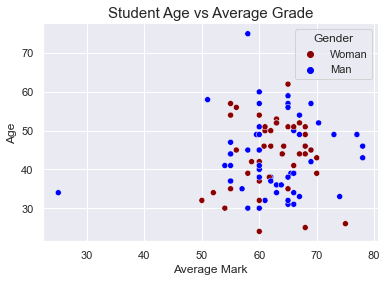

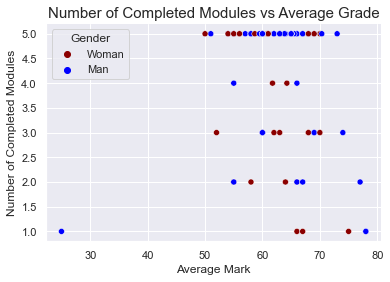

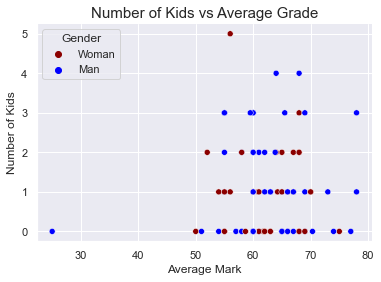

<IPython.core.display.Javascript object>

In [190]:
for i in scatter_configs:
    draw_scatter(*i)

**Conclusions:** Age and Average Grade columns show a slight positive correlation for Males in the visualizations, therefore, the correlations are calculated below 

**Calculating correlations**

In [ ]:
man = file[file["Gender"] == "Man"]
age_grade_correlation_males = man["Age_by_birth_year"].corr(man["Average_grade"])
age_grade_correlation_males

In [ ]:
age_grade_correlation = file["Age_by_birth_year"].corr(file["Average_grade"])
age_grade_correlation

Calculating all possible correlations in the data above the strength of 0.5

In [ ]:
file.corr()[["Kids", "Average_grade", "Age_by_birth_year", "Modules_num"]][
    (file.corr()[["Kids", "Average_grade", "Age_by_birth_year", "Modules_num"]] >= 0.05)
    | (
        file.corr()[["Kids", "Average_grade", "Age_by_birth_year", "Modules_num"]]
        <= -0.05
    )
]

In [ ]:
file.columns

Replacing categorical data with number encodings in order to calculate correlations

In [ ]:
file["Gender"].value_counts()

In [191]:
file["Gender"] = file["Gender"].astype("category")
file["Gender"] = file["Gender"].cat.rename_categories({"Man": 0, "Woman": 1})
file["Gender"].value_counts()

0    61
1    44
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
file["Gender"].corr(file["Average_grade"])

In [ ]:
file["Excited_data"].value_counts()

In [192]:
file["Excited_data"] = file["Excited_data"].astype("category")
file["Excited_data"] = file["Excited_data"].cat.rename_categories(
    {
        "Completely Disagree": 0,
        "Disagree": 1,
        "Meh": 2,
        "Agree": 3,
        "Completely Agree": 4,
    }
)
file["Excited_data"].value_counts()

3    47
4    35
2    20
1     2
0     1
Name: Excited_data, dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
file["Enjoy_data"].value_counts()

In [194]:
file["Enjoy_data"] = file["Enjoy_data"].astype("category")
file["Enjoy_data"] = file["Enjoy_data"].cat.rename_categories(
    {
        "Disagree": 0,
        "Meh": 1,
        "Agree": 2,
        "Completely Agree": 3,
    }
)
file["Enjoy_data"].value_counts()

2    56
3    36
1    11
0     2
Name: Enjoy_data, dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
file["Gender"].corr(file["Enjoy_data"])

Visualing correlations in categorical data

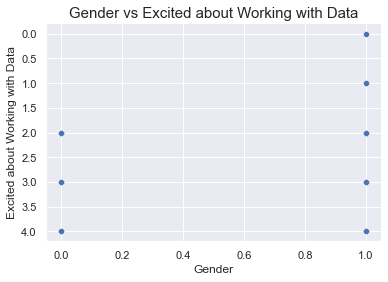

<IPython.core.display.Javascript object>

In [197]:
sns.scatterplot(
    data=file,
    x=file["Gender"],
    y=file["Excited_data"],
)
sns.despine()
plt.xlabel("Gender")
plt.ylabel("Excited about Working with Data")
plt.title("Gender vs Excited about Working with Data", fontsize=15)
plt.show()

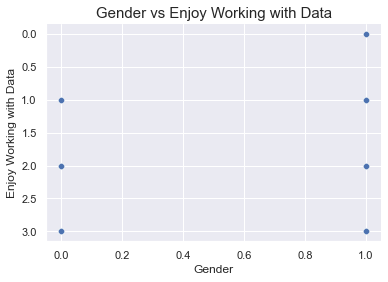

<IPython.core.display.Javascript object>

In [196]:
sns.scatterplot(
    data=file,
    x=file["Gender"],
    y=file["Enjoy_data"],
)
sns.despine()
plt.xlabel("Gender")
plt.ylabel("Enjoy Working with Data")
plt.title("Gender vs Enjoy Working with Data", fontsize=15)
plt.show()

**Renaming the categories back not to interrupt other algorithms**

In [202]:
file["Gender"] = file["Gender"].cat.rename_categories(["Man", "Woman"])
file["Enjoy_data"] = file["Enjoy_data"].cat.rename_categories(
    {0: "Disagree", 1: "Meh", 2: "Agree", 3: "Completely Agree"}
)
file["Excited_data"] = file["Excited_data"].cat.rename_categories(
    {
        0: "Completely Disagree",
        1: "Disagree",
        2: "Meh",
        3: "Agree",
        4: "Completely Agree",
    }
)

<IPython.core.display.Javascript object>

In [198]:
scatter_configs_cor = [
    [
        "Kids",
        "Age_by_birth_year",
        "Number of Kids",
        "Age",
        "Student Age vs Number of Kids",
    ],
    [
        "Modules_num",
        "Age_by_birth_year",
        "Number of Modules",
        "Age",
        "Student Age vs Number of Modules",
    ],
    [
        "Modules_num",
        "Prediction_grade",
        "Number of Modules",
        "Prediction Grade",
        "Number of Modules vs Prediction Grade",
    ],
]

<IPython.core.display.Javascript object>

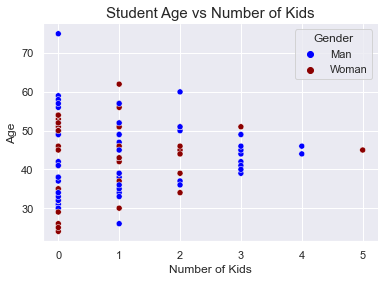

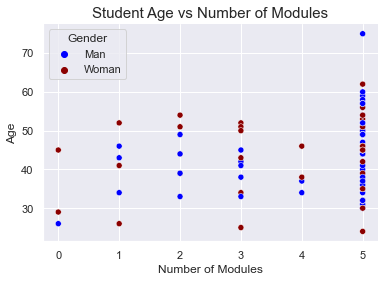

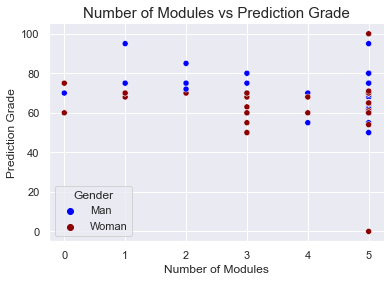

<IPython.core.display.Javascript object>

In [201]:
for i in scatter_configs_cor:
    draw_scatter(*i)

**Visualing Average Grade in combination with other columns to find relations**

Text(0.5, 1.0, 'Grade vs Number of Kids by Gender')

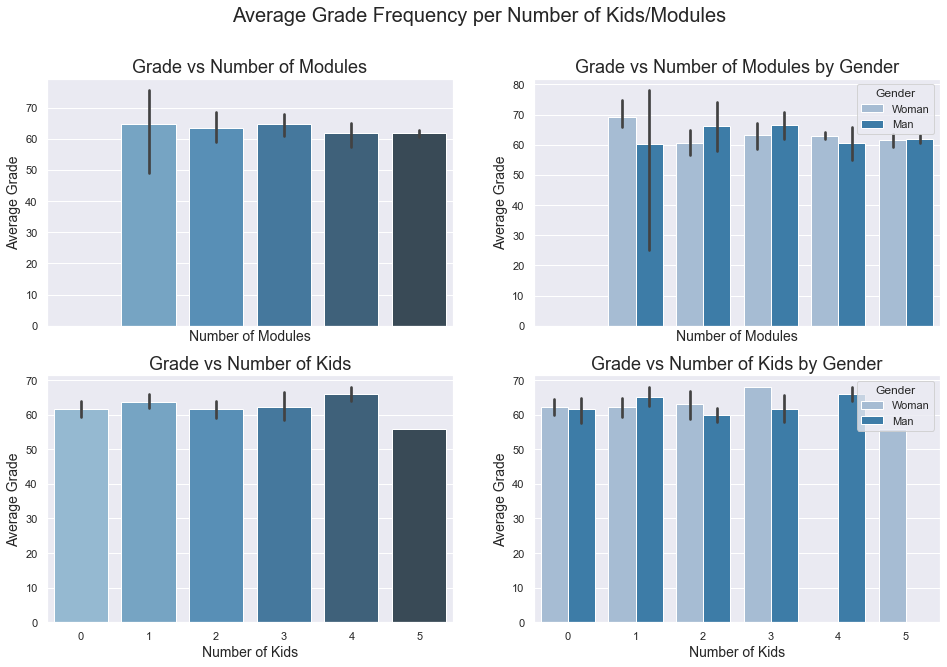

<IPython.core.display.Javascript object>

In [182]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16, 10))
fig.suptitle("Average Grade Frequency per Number of Kids/Modules", size=20)

sns.barplot(
    ax=axes[0,0], x="Modules_num", y="Average_grade", data=file, palette="Blues_d"
)
axes[0,0].set_xlabel("Number of Modules", size=14)
axes[0,0].set_ylabel("Average Grade", size=14)
axes[0,0].set_title("Grade vs Number of Modules", size=18)


sns.barplot(
    ax = axes[0,1],
    x="Modules_num",
    y="Average_grade",
    hue="Gender",
    data=file,
    palette=dict({"Woman": "#9ebcda", "Man": "#2c7fb8"}),
)
axes[0,1].set_xlabel("Number of Modules",size=14)
axes[0,1].set_ylabel("Average Grade", size=14)
axes[0,1].set_title("Grade vs Number of Modules by Gender", size=18)


sns.barplot(
    ax=axes[1,0], x="Kids", y="Average_grade", data=file, palette="Blues_d"
)
axes[1,0].set_xlabel("Number of Kids", size=14)
axes[1,0].set_ylabel("Average Grade", size=14)
axes[1,0].set_title("Grade vs Number of Kids", size=18)

sns.barplot(
    ax = axes[1,1],
    x="Kids",
    y="Average_grade",
    hue="Gender",
    data=file,
    palette=dict({"Woman": "#9ebcda", "Man": "#2c7fb8"}),
)
axes[1,1].set_xlabel("Number of Kids", size=14)
axes[1,1].set_ylabel("Average Grade", size=14)
axes[1,1].set_title("Grade vs Number of Kids by Gender", size=18)


**Visualizing Frequency Distributions at RKC**

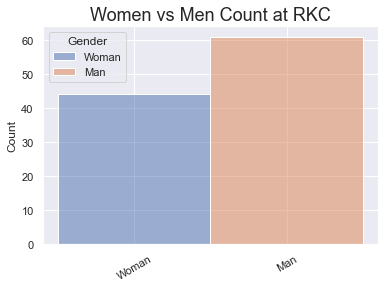

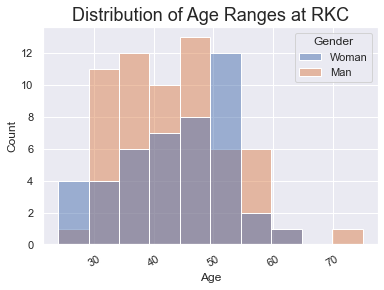

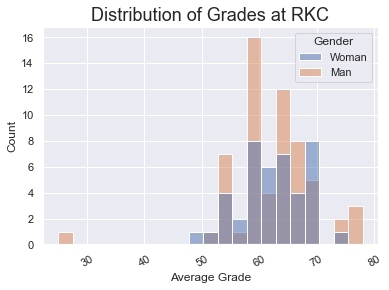

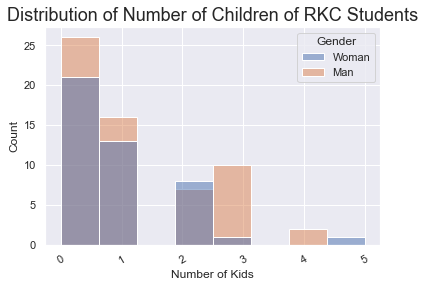

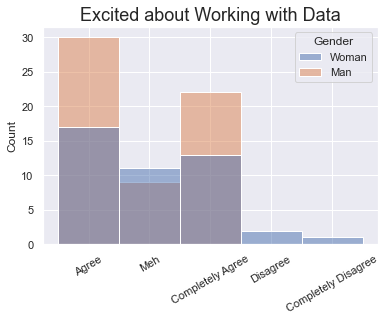

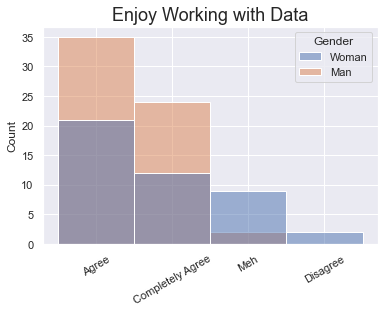

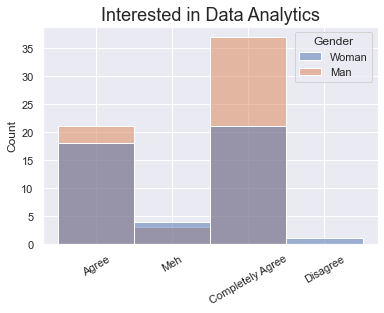

<IPython.core.display.Javascript object>

In [183]:
def draw_hist(x, x_label, title):
    sns.histplot(x=x, hue="Gender", data=file)
    plt.title(title, size=18)
    plt.xticks(rotation=30)
    plt.xlabel(x_label)
    plt.show()


hist_configs = [
    ["Gender", "", "Women vs Men Count at RKC"],
    ["Age_by_birth_year", "Age", "Distribution of Age Ranges at RKC"],
    ["Average_grade", "Average Grade", "Distribution of Grades at RKC"],
    ["Kids", "Number of Kids", "Distribution of Number of Children of RKC Students"],
    ["Excited_data", "", "Excited about Working with Data"],
    ["Enjoy_data", "", "Enjoy Working with Data"],
    ["Interested_DA", "", "Interested in Data Analytics"],
]

for i in hist_configs:
    draw_hist(*i)

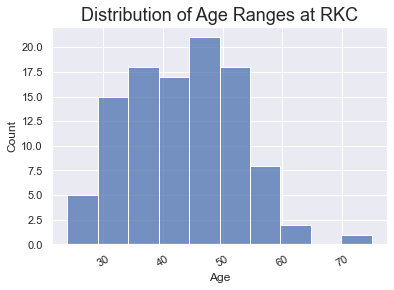

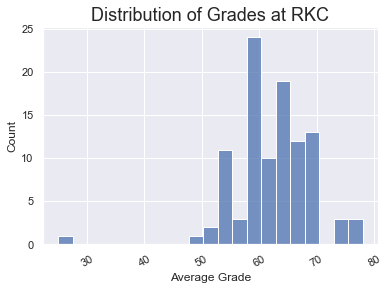

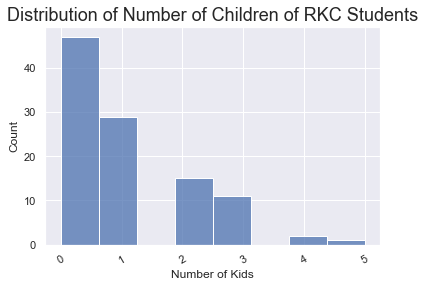

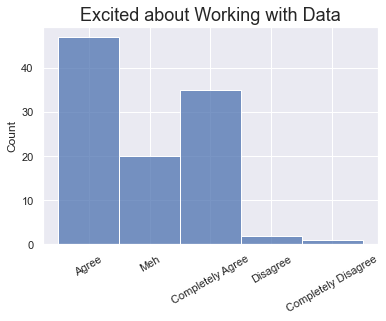

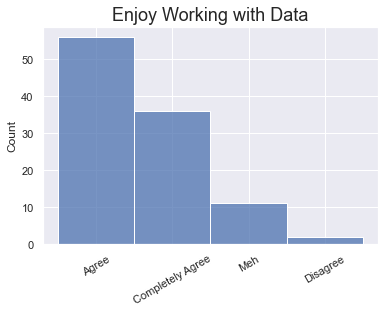

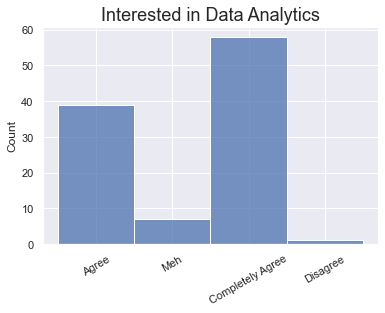

<IPython.core.display.Javascript object>

In [184]:
def draw_hist(x, x_label, title):
    sns.histplot(x=x, data=file)
    plt.title(title, size=18)
    plt.xticks(rotation=30)
    plt.xlabel(x_label)
    plt.show()


hist_configs = [
    ["Age_by_birth_year", "Age", "Distribution of Age Ranges at RKC"],
    ["Average_grade", "Average Grade", "Distribution of Grades at RKC"],
    ["Kids", "Number of Kids", "Distribution of Number of Children of RKC Students"],
    ["Excited_data", "", "Excited about Working with Data"],
    ["Enjoy_data", "", "Enjoy Working with Data"],
    ["Interested_DA", "", "Interested in Data Analytics"],
]

for i in hist_configs:
    draw_hist(*i)

## 6. Statistical Summaries

In [ ]:
file.describe()

In [ ]:
file["Enjoy_data"].describe()

In [ ]:
file["Excited_data"].describe()

In [ ]:
file["Afraid_data"].describe()

In [ ]:
file["Interested_DA"].describe()

In [ ]:
file["Work_hard"].describe()

In [ ]:
file["Gender"].describe()

In [ ]:
file["Modules_num"].describe()

In [ ]:
file["Height_relative"].describe()

#### Pivot Tables
##### Average Grade Stats by Gender

In [ ]:
grouped_by_gender = file.groupby("Gender")
values = grouped_by_gender[["Average_grade"]]
gender_stats = values.agg([np.min, np.max, np.mean, np.std, np.median])
gender_stats.columns = ["Min", "Max", "Mean", "Standard Deviation", "Median"]
gender_stats.iloc[0] = [round(x, 1)for x in gender_stats.iloc[0]]
gender_stats.iloc[1] = [round(x, 1)for x in gender_stats.iloc[1]]

In [ ]:
color1 = 'white'
color2 = 'lightgrey'
header_color = "lightblue"
values = gender_stats.columns, gender_stats.iloc[0], gender_stats.iloc[1]
fig = go.Figure(data=[go.Table( 
    header=dict(values=["","Males", "Females"], 
                fill_color=header_color,
                height = 50,
                align="left",
                font=dict(family="Lato", size=18)), 
    cells=dict(values=values,
               align="left", 
               height = 50, 
               font=dict(family="Lato", size=20), 
               format=None, formatsrc=None,
               fill_color = None
              ))]) 
fig.update_layout(width=610, title="Average Grade Statistical Summaries")
fig.update_layout({"margin": {"t":50}})
fig.show()

##### Effect of Number of Kids on Average Grade

In [171]:
# create a method that groups by and counts agg stats
grouped_by_kids = file.groupby("Kids")
values = grouped_by_kids[["Average_grade"]]
kids_stats = values.agg([np.min, np.max, np.mean, np.std, np.median])
kids_stats

Average_grade                                   
              amin  amax       mean       std  median
Kids                                                 
0             25.0  77.0  61.776957  7.987933  61.875
1             54.0  78.0  63.752857  5.532400  63.625
2             52.0  68.0  61.559286  4.808884  61.500
3             55.0  78.0  62.272727  7.195011  60.000
4             64.0  68.0  66.000000  2.828427  66.000
5             56.0  56.0  56.000000       NaN  56.000

<IPython.core.display.Javascript object>

In [172]:
grouped_by_excited = file.groupby("Excited_data")
values = grouped_by_excited[["Average_grade"]]
excited_stats = values.agg([np.min, np.max, np.mean, np.std])
excited_stats

Average_grade                            
                             amin   amax       mean       std
Excited_data                                                 
Agree                        50.0  70.00  61.166444  4.953781
Completely Agree             25.0  78.00  63.988000  9.288016
Completely Disagree          66.0  66.00  66.000000       NaN
Disagree                     60.0  68.00  64.000000  5.656854
Meh                          52.0  70.33  61.872632  4.972944

<IPython.core.display.Javascript object>

In [173]:
grouped_by_interested = file.groupby("Interested_DA")
values = grouped_by_interested[["Average_grade"]]
interested_stats = values.agg([np.min, np.max, np.mean, np.std])
interested_stats

Average_grade                            
                          amin   amax       mean       std
Interested_DA                                             
Agree                     50.0  70.33  61.504211  4.879403
Completely Agree          25.0  78.00  63.151607  7.921619
Disagree                  66.0  66.00  66.000000       NaN
Meh                       51.0  68.00  60.285714  6.210590

<IPython.core.display.Javascript object>

## 7. Data Visualization for Presentation (Explanatory Visuals)

**Visualing Gender Counts for Presentation**

In [174]:
gender_counts = file["Gender"].value_counts()

fig = go.Figure()
fig.add_trace(
    go.Indicator(
        value=gender_counts[0],
        title="Males",
        gauge={"axis": {"visible": False}},
        domain={"row": 0, "column": 0},
    )
)
fig.add_trace(
    go.Indicator(
        value=gender_counts[1],
        title="Females",
        gauge={"axis": {"visible": False}},
        domain={"row": 0, "column": 1},
    )
)
fig.update_layout(
    grid={"rows": 1, "columns": 2, "pattern": "independent"},
    template={"data": {"indicator": [{"delta": {"reference": 90}}]}},
)

<IPython.core.display.Javascript object>

#### Displaying the head for Presentation Slides

In [203]:
display_file = file[
    [
        "Gender",
        "Age_by_birth_year",
        "Kids",
        "Average_grade",
        "Excited_data",
        "Enjoy_data",
    ]
].tail()
display_file.columns = [
    "Gender",
    "Age",
    "Number of Kids",
    "Average Grade",
    "Excited about Data",
    "Enjoy Working with Data",
]
display_file.columns.tolist()

['Gender',
 'Age',
 'Number of Kids',
 'Average Grade',
 'Excited about Data',
 'Enjoy Working with Data']

<IPython.core.display.Javascript object>

In [204]:
color1 = "white"
color2 = "lightgrey"
header_color = "lightblue"
values = (
    display_file.iloc[:, 0],
    display_file.iloc[:, 1],
    display_file.iloc[:, 2],
    display_file.iloc[:, 3],
    display_file.iloc[:, 4],
    display_file.iloc[:, 5],
)
fig = go.Figure(
    data=[
        go.Table(
            header=dict(
                values=display_file.columns.tolist(),
                fill_color=header_color,
                height=50,
                align="left",
                font=dict(family="Lato", size=20),
            ),
            cells=dict(
                values=values,
                align="left",
                height=50,
                font=dict(family="Lato", size=20),
                format=None,
                formatsrc=None,
                fill_color=None,
            ),
        )
    ]
)
fig.update_layout(width=1100, height=1000, title="Data Preview")
fig.update_layout({"margin": {"t": 50}})
fig.show()

<IPython.core.display.Javascript object>

## 8. Hypothesis Testing

### 8.1 Permutation Tests

- **Null Hypothesis: Elder females with kids and younger males with no kids perform equally good at academia**
- **Hypothesis: Elder females with kids perform academically better than younger males with no kids**

1. we aggregate the data and find the mean per each group
2. calculate the mean difference

In [205]:
elder_female_with_kids = file[
    (file["Age_by_birth_year"] > 40) & (file["Kids"] > 0) & (file["Gender"] == "Woman")
]
elder_female_with_kids_average_grade = elder_female_with_kids["Average_grade"].mean()

younger_male_no_kids = file[
    (file["Kids"] == 0) & (file["Age_by_birth_year"] <= 40) & (file["Gender"] == "Man")
]
younger_male_no_kids_average_grade = younger_male_no_kids["Average_grade"].mean()

mean_difference = (
    elder_female_with_kids_average_grade - younger_male_no_kids_average_grade
)
mean_difference

3.8237104072398154

<IPython.core.display.Javascript object>

3. we get the list of all grade values
4. randomly assign these values either to male or to female group
5. conduct the random assignment repeteadly 1000 times (simulating a new study)
6. calculate the mean differences on each iteration and append to a separate list
6. create a dictionary of frequencies of each possible mean difference value

In [208]:
iter_mean_differences = []
group_a_values = elder_female_with_kids["Average_grade"].tolist()
group_b_values = younger_male_no_kids["Average_grade"].tolist()
all_grades = group_a_values + group_b_values

for i in range(1000):
    males = []
    females = []
    for grade in all_grades:
        random_value = np.random.rand()
        if random_value >= 0.5:
            males.append(grade)
        else:
            females.append(grade)
    iteration_mean_difference = np.mean(females) - np.mean(males)
    iter_mean_differences.append(iteration_mean_difference)

sampling_distribution = {}

for iter_mean_difference in iter_mean_differences:
    if sampling_distribution.get(iter_mean_difference, False):
        val = sampling_distribution.get(iter_mean_difference)
        val = val + 1
        sampling_distribution[iter_mean_difference] = val
    else:
        sampling_distribution[iter_mean_difference] = 1

<IPython.core.display.Javascript object>

8. determine if the mean difference was random or not
- we set a p value threshold of 0.05 (5%)
- we find the frequency of a mean diffirence equal or higher than the mean dif observed in our dataset
- we divide the amount of such mean diffirences by the number of simulated random datasets

In [209]:
frequencies = []
for key in sampling_distribution.keys():
    if key >= mean_difference:
        frequencies.append(key)
frequencies
sum_freq = len(frequencies)
p_value = sum_freq / 1000
p_value

0.0

<IPython.core.display.Javascript object>

In [210]:
fig = go.Figure()
fig.add_trace(
    go.Indicator(
        value=p_value * 100,
        number={"suffix": "%"},
        title="Calculated P-Value",
        gauge={"axis": {"visible": False}},
        domain={"row": 0, "column": 0},
    )
)
fig.add_trace(
    go.Indicator(
        number={"suffix": "%"},
        value=0.05 * 100,
        title="Threshold",
        gauge={"axis": {"visible": False}},
        domain={"row": 0, "column": 1},
    )
)
fig.update_layout(
    grid={"rows": 1, "columns": 2, "pattern": "independent"},
    template={"data": {"indicator": [{"delta": {"reference": 90}}]}},
)

<IPython.core.display.Javascript object>

#### **Conclusion:**
**The p value is 0.117, which is higher than the threshold of 0.05, therefore, we cocnlude that the difference in the means of grades of females and males is purely random.**

### 8.2 Student T Tests


In [211]:
## testing the same null and alternative hypotheses
elder_female_with_kids = file[
    (file["Age_by_birth_year"] > 40) & (file["Kids"] > 0) & (file["Gender"] == "Woman")
]
elder_female_with_kids_average_grade = elder_female_with_kids["Average_grade"].mean()

younger_male_no_kids = file[
    (file["Kids"] == 0) & (file["Age_by_birth_year"] <= 40) & (file["Gender"] == "Man")
]
younger_male_no_kids_average_grade = younger_male_no_kids["Average_grade"].mean()

mean_difference = (
    elder_female_with_kids_average_grade - younger_male_no_kids_average_grade
)
print(
    "Elder women with kids: ",
    elder_female_with_kids_average_grade,
    "\nYounger men no kids: ",
    younger_male_no_kids_average_grade,
    "\nDifference: ",
    mean_difference,
)

Elder women with kids:  63.59294117647058 
Younger men no kids:  59.76923076923077 
Difference:  3.8237104072398154


<IPython.core.display.Javascript object>

In [213]:
fig = go.Figure()

fig.add_trace(
    go.Indicator(
        value=round(elder_female_with_kids_average_grade, 1),
        title="Average Grade of Elder Females with Kids",
        gauge={"axis": {"visible": False}},
        domain={"row": 0, "column": 0},
    )
)
fig.add_trace(
    go.Indicator(
        value=round(younger_male_no_kids_average_grade, 1),
        title="Average Grade of Younger Males with No Kids",
        gauge={"axis": {"visible": False}},
        domain={"row": 1, "column": 0},
    )
)

fig.update_layout(
    grid={"rows": 2, "columns": 1, "pattern": "independent"},
    template={"data": {"indicator": [{"delta": {"reference": 90}}]}},
)

<IPython.core.display.Javascript object>

#### 1. finding the signal - difference between the mean

In [214]:
signal = mean_difference
signal

3.8237104072398154

<IPython.core.display.Javascript object>

#### 2. finding the group variability

In [215]:
variance_group_a = elder_female_with_kids["Average_grade"].var()
variance_group_b = younger_male_no_kids["Average_grade"].var()

print("Variance of Group A (elder females with kids): ", variance_group_a)
print("Variance of Group B (younger males with no kids): ", variance_group_b)

Variance of Group A (elder females with kids):  21.830909558823528
Variance of Group B (younger males with no kids):  133.85897435897434


<IPython.core.display.Javascript object>

In [216]:
num_group_a = elder_female_with_kids["Average_grade"].count()
num_group_b = younger_male_no_kids["Average_grade"].count()

print("Number of samples in Group A (elder females with kids): ", num_group_a)
print("Number of samples in Group B (younger males with no kids): ", num_group_b)

Number of samples in Group A (elder females with kids):  17
Number of samples in Group B (younger males with no kids):  13


<IPython.core.display.Javascript object>

#### 3. finding the t-value

In [217]:
t_value = signal / math.sqrt(
    (variance_group_a / num_group_a) + (variance_group_b / num_group_b)
)
print("T-value is ", t_value)

T-value is  1.123599855845671


<IPython.core.display.Javascript object>

#### 4. finding the degree of freedom

In [218]:
degree_free = num_group_a + num_group_b - 2
degree_free

28

<IPython.core.display.Javascript object>

#### 5. finding the critical value

In [219]:
critical_value = scipy.stats.t.ppf(q=1 - 0.05 / 2, df=28)
critical_value

2.048407141795244

<IPython.core.display.Javascript object>

#### 6. comparing the t-value and the critical value

In [220]:
result = max(t_value, critical_value)
result

2.048407141795244

<IPython.core.display.Javascript object>

In [221]:
fig = go.Figure()

fig.add_trace(
    go.Indicator(
        value=t_value,
        title="T-Value",
        gauge={"axis": {"visible": False}},
        domain={"row": 0, "column": 0},
    )
)
fig.add_trace(
    go.Indicator(
        value=critical_value,
        title="Critical Value",
        gauge={"axis": {"visible": False}},
        domain={"row": 0, "column": 1},
    )
)

fig.update_layout(
    grid={"rows": 1, "columns": 2, "pattern": "independent"},
    template={"data": {"indicator": [{"delta": {"reference": 90}}]}},
)

<IPython.core.display.Javascript object>

#### **Conclusion:**
**The t-value is less than the critical value, therefore, the null hypothesis can not be rejected.**

### 8.3 Comparing Interest in Data
- **Null Hypothesis: Men and females equally enjoy working with data**
- **Hypothesis: Men enjoy working with data more than females**

In [222]:
males = (file["Gender"] == "Man").sum()
females = (file["Gender"] == "Woman").sum()

males_enj_data = (
    (file["Gender"] == "Man")
    & ((file["Enjoy_data"] == "Agree") | (file["Enjoy_data"] == "Completely Agree"))
).sum()
females_enj_data = (
    (file["Gender"] == "Woman")
    & ((file["Enjoy_data"] == "Agree") | (file["Enjoy_data"] == "Completely Agree"))
).sum()

proportion_males_enj = round(males_enj_data / males, 2) * 100
proportion_females_enj = round(females_enj_data / females, 2) * 100
print(
    "Males proportion who enjoy data: ",
    proportion_males_enj,
    " Females proportion: ",
    proportion_females_enj,
)

Males proportion who enjoy data:  97.0  Females proportion:  75.0


<IPython.core.display.Javascript object>

In [223]:
males_exc_data = (
    (file["Gender"] == "Man")
    & ((file["Excited_data"] == "Agree") | (file["Excited_data"] == "Completely Agree"))
).sum()
females_exc_data = (
    (file["Gender"] == "Woman")
    & ((file["Excited_data"] == "Agree") | (file["Excited_data"] == "Completely Agree"))
).sum()

proportion_males_exc = round(males_exc_data / males, 2) * 100
proportion_females_exc = round(females_exc_data / females, 2) * 100
print(
    "Males proportion who are excited to work with data: ",
    proportion_males_exc,
    " Females proportion: ",
    proportion_females_exc,
)

Males proportion who are excited to work with data:  85.0  Females proportion:  68.0


<IPython.core.display.Javascript object>

#### Displaying the data with Indicators

In [225]:
fig = go.Figure()

fig.add_trace(
    go.Indicator(
        number={"suffix": "%"},
        value=proportion_males_enj,
        title="Males, enjoy working with data",
        gauge={"axis": {"visible": False}},
        domain={"row": 0, "column": 0},
    )
)
fig.add_trace(
    go.Indicator(
        number={"suffix": "%"},
        value=proportion_females_enj,
        title="Females, enjoy working with data",
        gauge={"axis": {"visible": False}},
        domain={"row": 0, "column": 1},
    )
)
fig.add_trace(
    go.Indicator(
        number={"suffix": "%"},
        value=proportion_males_exc,
        title="Males, excited to work with data",
        gauge={"axis": {"visible": False}},
        domain={"row": 1, "column": 0},
    )
)
fig.add_trace(
    go.Indicator(
        number={"suffix": "%"},
        value=proportion_females_exc,
        title="Females, excited to work with data",
        gauge={"axis": {"visible": False}},
        domain={"row": 1, "column": 1},
    )
)

fig.update_layout(
    grid={"rows": 2, "columns": 2, "pattern": "independent"},
    template={"data": {"indicator": [{"delta": {"reference": 90}}]}},
)

<IPython.core.display.Javascript object>